# MidProject: Cats and Dogs, Better
Applied Neural Networks <br/>
Dr. Leslie Kerby

Use the Cats and Dogs dataset in Kaggle from Homework 3. Download the dataset and perform necessary data wrangling or preprocessing, just like you did in HW 3 (ie in Parts 1-3).

In [1]:
#Install modules and download dataset

# Workaround for an issue with RandomizedSearchCV with np.arange() by reverting
# to the last sklearn version without that issue.
!pip install scikit-learn==0.21.2

# Install the latest Kaggle library package.
!pip install --upgrade --force-reinstall --no-deps kaggle

# For uploading my kaggle.json.
from google.colab import files
files.upload()

# Download the dataset to our local Colab VM. The data will persist here until
# this runtime dies, so you only have to run this cell once per session.
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c dogs-vs-cats

# Unzip the training data into /train/ and remove everything else. We don't use
# the images in test1.zip since they come unlabeled. For our purposes, we want
# labeled testing data to see how effective our models are. 
!mkdir train
!unzip dogs-vs-cats.zip -d .
!unzip train.zip -d .
!rm *.zip

import os

filenames = os.listdir("./train/")
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'cat':
        categories.append(1)
    else:
        categories.append(0)

import pandas as pd
df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

def resize_img(file_path):
  img = cv2.imread(file_path, cv2.IMREAD_COLOR)
  return cv2.resize(img, (80, 80)) # 80 pixels by 80 pixels

import numpy as np
np.random.seed(42)
X = np.ndarray((25000, 80, 80, 3)) # 25000 images, 80 x 80 pixels, 3 channels (RGB) 
for i,image_file in enumerate(df['filename']):
    X[i,:] = resize_img('./train/' + image_file)
y = df['category'].to_numpy(dtype=np.byte)

# 15,000 for training, 5,000 for validation, and 5,000 for testing.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=5000)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=5000)
X_train /= 255
X_test /= 255
X_val /= 255

import tensorflow as tf
from tensorflow import keras
tf.random.set_seed(42)


     |████████████████████████████████| 6.7MB 9.0MB/s 
ERROR: umap-learn 0.5.1 has requirement scikit-learn>=0.22, but you'll have scikit-learn 0.21.2 which is incompatible.
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
     |████████████████████████████████| 61kB 5.5MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-cp37-none-any.whl size=73053 sha256=424d76c05423aff4bc6b6d3d9f54db3f8013c3f723633277105ffdded6ddfb3c
  Stored in directory: /root/.cache/pip/wheels/a1/6a/26/d30b7499ff85a4a4593377a87ecf55f7d08af42f0de9b60303
Successfully built kaggle
  Found existing installation: kaggle 1.5.10
    Uninstalling kaggle-1.5.10:
      Successfully uninstalled kaggle-1.5.10


Streaming output truncated to the last 5000 lines.
  inflating: ./train/dog.5499.jpg    
  inflating: ./train/dog.55.jpg      
  inflating: ./train/dog.550.jpg     
  inflating: ./train/dog.5500.jpg    
  inflating: ./train/dog.5501.jpg    
  inflating: ./train/dog.5502.jpg    
  inflating: ./train/dog.5503.jpg    
  inflating: ./train/dog.5504.jpg    
  inflating: ./train/dog.5505.jpg    
  inflating: ./train/dog.5506.jpg    
  inflating: ./train/dog.5507.jpg    
  inflating: ./train/dog.5508.jpg    
  inflating: ./train/dog.5509.jpg    
  inflating: ./train/dog.551.jpg     
  inflating: ./train/dog.5510.jpg    
  inflating: ./train/dog.5511.jpg    
  inflating: ./train/dog.5512.jpg    
  inflating: ./train/dog.5513.jpg    
  inflating: ./train/dog.5514.jpg    
  inflating: ./train/dog.5515.jpg    
  inflating: ./train/dog.5516.jpg    
  inflating: ./train/dog.5517.jpg    
  inflating: ./train/dog.5518.jpg    
  inflating: ./train/dog.5519.jpg    
  inflating: ./train/dog.552.jpg     

In [30]:
keras.backend.clear_session()

**Part 1** <br/>
Create a CNN dog/cat classifier with the following architecture: <br/>
Conv2D: 64 filters, 7x7 kernel <br/>
MaxPooling2D: 2x2 pool <br/>
Conv2D: 128 filters, 3x3 kernel <br/>
Conv2D: 128 filters, 3x3 kernel <br/>
MaxPooling2D: 2x2 pool <br/>
Conv2D: 256 filters, 3x3 kernel <br/>
Conv2D: 256 filters, 3x3 kernel <br/>
MaxPooling2D: 2x2 pool <br/>
Flatten <br/>
Dense: 128 neurons <br/>
Dropout(15%) <br/>
Dense: 64 neurons <br/>
Dropout(15%) <br/>
Output <br/>
strides=1, padding="same", and activation="relu" for all relevant layers <br/>
Utilize the Nadam optimizer and Early Stopping

What is your accuracy for the validation set and for the test set? Plot several misclassified images.

Save your accuracy and val_accuracy each epoch. You will plot them in Part 4.

Epoch 1/30
469/469 [==============================] - 11s 21ms/step - loss: 1.0603 - accuracy: 0.5064 - val_loss: 0.7795 - val_accuracy: 0.4938
Epoch 2/30
469/469 [==============================] - 9s 20ms/step - loss: 0.7336 - accuracy: 0.4954 - val_loss: 0.6948 - val_accuracy: 0.5062
Epoch 3/30
469/469 [==============================] - 9s 20ms/step - loss: 0.6961 - accuracy: 0.5023 - val_loss: 0.6945 - val_accuracy: 0.4938
Epoch 4/30
469/469 [==============================] - 9s 20ms/step - loss: 0.6938 - accuracy: 0.5036 - val_loss: 0.6966 - val_accuracy: 0.4938
Epoch 5/30
469/469 [==============================] - 9s 20ms/step - loss: 0.6977 - accuracy: 0.4934 - val_loss: 0.6936 - val_accuracy: 0.4938
Epoch 6/30
469/469 [==============================] - 9s 20ms/step - loss: 0.6941 - accuracy: 0.4904 - val_loss: 0.6935 - val_accuracy: 0.4938
Epoch 7/30
469/469 [==============================] - 9s 20ms/step - loss: 0.6935 - accuracy: 0.5098 - val_loss: 0.6932 - val_accuracy: 0.493

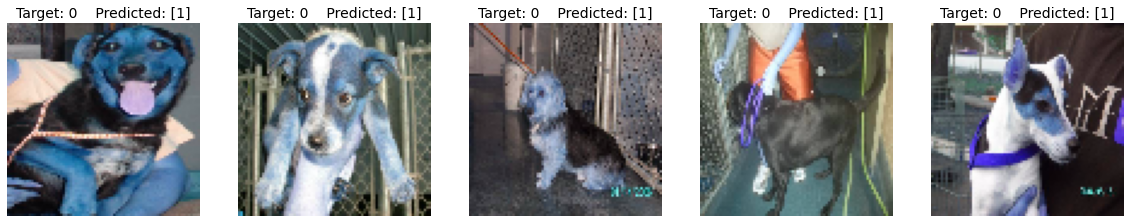

In [29]:
model = keras.models.Sequential([
        keras.layers.Conv2D(filters=64, kernel_size=[7,7], strides=[1,1],
                            padding="same", activation="relu", input_shape=[80,80,3]),
        keras.layers.MaxPool2D(pool_size=2),
        keras.layers.Conv2D(filters=128, kernel_size=3, strides=1, padding="same",
                            activation="relu"),
        keras.layers.Conv2D(filters=128, kernel_size=3, strides=1, padding="same",
                            activation="relu"),
        keras.layers.MaxPool2D(2),
        keras.layers.Conv2D(256, 3),
        keras.layers.Conv2D(256, 3),
        keras.layers.MaxPool2D(2),
        keras.layers.Flatten(),
        keras.layers.Dense(128, activation="relu"),
        keras.layers.Dropout(0.15),
        keras.layers.Dense(64, activation="relu"),
        keras.layers.Dropout(0.15),
        keras.layers.Dense(1, activation="sigmoid")
])
model.compile(loss="binary_crossentropy", optimizer="nadam", metrics=["accuracy"])
history1 = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val), callbacks=[keras.callbacks.EarlyStopping(patience=4, restore_best_weights=True)])

results = model.evaluate(X_test, y_test)
print(f'Model Results: {results}')

pred = (model.predict(X_test) > 0.5).astype("int32")

# Create a list of indices that point to images that our model incorrectly
# predicted.
misclassifiedIndexes = []
index = 0
for target, predict in zip(y_test, pred):
  if target != predict:
    misclassifiedIndexes.append(index)
  index += 1

# Print the first 5 misclassified images.
plt.figure(figsize=(20,4))
for i in range(5):
  plt.subplot(1, 5, i + 1)
  plt.imshow(X_test[misclassifiedIndexes[i]], cmap='binary')
  plt.axis('off')
  plt.title(f'Target: {y_test[misclassifiedIndexes[i]]}    Predicted: {pred[misclassifiedIndexes[i]]}', fontsize=14)

plt.show()

**Part 2** </br>
Add data augmentation, through the ImageDataGenerator in Keras. Try different CNN architectures and/or parameters to improve your model. You may also try splitting up the dataset differently (ie more images in training and less in validation and testing sets).

What is the accuracy of your best model (on both validation and testing sets)? Plot several misclassified images. Save your accuracy and val_accuracy per epoch (from your best model). You will plot them in Part 4.

In [31]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=20, horizontal_flip=True)

model = keras.models.Sequential([
        keras.layers.Conv2D(filters=64, kernel_size=[7,7], strides=[1,1],
                            padding="same", activation="relu", input_shape=[80,80,3]),
        keras.layers.MaxPool2D(pool_size=2),
        keras.layers.Conv2D(filters=128, kernel_size=3, strides=1, padding="same",
                            activation="relu"),
        keras.layers.Conv2D(filters=128, kernel_size=3, strides=1, padding="same",
                            activation="relu"),
        keras.layers.MaxPool2D(2),
        keras.layers.Conv2D(256, 3, padding="same"),
        keras.layers.Conv2D(256, 3, padding="same"),
        keras.layers.MaxPool2D(2),
        keras.layers.Flatten(),
        keras.layers.Dense(128, activation="relu"),
        keras.layers.Dropout(0.15),
        keras.layers.Dense(64, activation="relu"),
        keras.layers.Dropout(0.15),
        keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam",
              metrics=["accuracy"])

history2 = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    epochs=30,
                    validation_data=(X_val, y_val),
                    callbacks=[keras.callbacks.EarlyStopping(patience=5)])

results = model.evaluate(X_test, y_test)
print(f'Model Results: {results}')



Epoch 1/30
469/469 [==============================] - 23s 48ms/step - loss: 1.7851 - accuracy: 0.4902 - val_loss: 0.6949 - val_accuracy: 0.4926
Epoch 2/30
469/469 [==============================] - 23s 49ms/step - loss: 0.7065 - accuracy: 0.5010 - val_loss: 0.6932 - val_accuracy: 0.5062
Epoch 3/30
469/469 [==============================] - 22s 47ms/step - loss: 0.6985 - accuracy: 0.4979 - val_loss: 0.6931 - val_accuracy: 0.4964
Epoch 4/30
469/469 [==============================] - 22s 47ms/step - loss: 0.6990 - accuracy: 0.5008 - val_loss: 0.6945 - val_accuracy: 0.4938
Epoch 5/30
469/469 [==============================] - 22s 47ms/step - loss: 0.6959 - accuracy: 0.5067 - val_loss: 0.6931 - val_accuracy: 0.5062
Epoch 6/30
469/469 [==============================] - 22s 46ms/step - loss: 0.6954 - accuracy: 0.4980 - val_loss: 0.6940 - val_accuracy: 0.5062
Epoch 7/30
469/469 [==============================] - 22s 47ms/step - loss: 0.6965 - accuracy: 0.4938 - val_loss: 0.6933 - val_accuracy:

ValueError: ignored

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


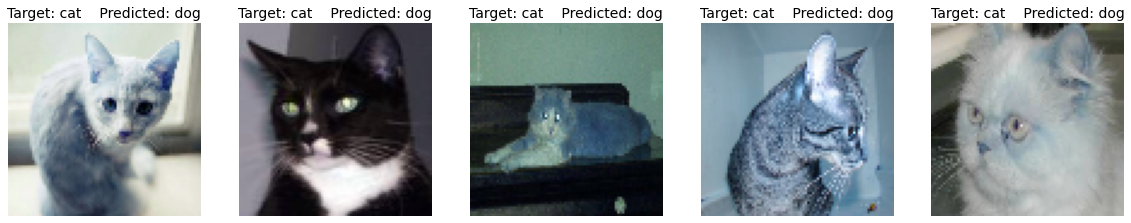

In [40]:
#Plot misclassified images. 
predictions = model.predict_classes(X_test)

misclassifiedIndexes = []
#Grab all images that were incorrect. 
index = 0
for target, predict in zip(y_test, predictions):
  if target != predict:
    misclassifiedIndexes.append(index)
  index += 1

import matplotlib.pyplot as plt

classes = ['dog', 'cat']

plt.figure(figsize=(20,4))
for index in range(5):
  plt.subplot(1,5,index+1)
  plt.imshow(X_test[misclassifiedIndexes[index]], cmap='binary')
  plt.axis('off')
  plt.title(f'Target: {classes[y_test[misclassifiedIndexes[index]]]}    Predicted: {classes[predictions[misclassifiedIndexes[index]]]}', fontsize=14)

plt.show()

In [20]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=20, horizontal_flip=True)

model = keras.models.Sequential([
        keras.layers.Conv2D(filters=64, kernel_size=[7,7], strides=[1,1],
                            padding="same", activation="selu", input_shape=[80,80,3]),
        keras.layers.MaxPool2D(pool_size=2),
        keras.layers.Conv2D(filters=128, kernel_size=3, strides=1, padding="same",
                            activation="selu"),
        keras.layers.Conv2D(filters=128, kernel_size=3, strides=1, padding="same",
                            activation="selu"),
        keras.layers.Conv2D(filters=128, kernel_size=3, strides=1, padding="same",
                            activation="selu"),
        keras.layers.MaxPool2D(2),
        keras.layers.Conv2D(256, 3, padding="same"),
        keras.layers.Conv2D(256, 3, padding="same"),
        keras.layers.Conv2D(256, 3, padding="same"),
        keras.layers.MaxPool2D(2),
        keras.layers.Flatten(),
        keras.layers.Dense(128, activation="selu"),
        keras.layers.Dropout(0.15),
        keras.layers.Dense(64, activation="selu"),
        keras.layers.Dropout(0.15),
        keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam",
              metrics=["accuracy"])

history2 = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    epochs=30,
                    validation_data=(X_val, y_val),
                    callbacks=[keras.callbacks.EarlyStopping(patience=5)])

results = model.evaluate(X_test, y_test)
print(f'Model Results: {results}')

#Plot misclassified images. 
predictions = model.predict_classes(X_test)

misclassifiedIndexes = []
#Grab all images that were incorrect. 
index = 0
for target, predict in zip(y_test, predictions):
  if target != predict:
    misclassifiedIndexes.append(index)
  index += 1

import matplotlib.pyplot as plt

classes = ['dog', 'cat']

plt.figure(figsize=(20,4))
for index in range(5):
  plt.subplot(1,5,index+1)
  plt.imshow(X_test[misclassifiedIndexes[index]], cmap='binary')
  plt.axis('off')
  plt.title(f'Target: {classes[y_test[misclassifiedIndexes[index]]]}    Predicted: {classes[predictions[misclassifiedIndexes[index]]]}', fontsize=14)

plt.show()

Epoch 1/30
469/469 [==============================] - 25s 49ms/step - loss: 9.5608 - accuracy: 0.5017 - val_loss: 0.7183 - val_accuracy: 0.6004
Epoch 2/30
469/469 [==============================] - 23s 49ms/step - loss: 0.6868 - accuracy: 0.6586 - val_loss: 0.5134 - val_accuracy: 0.7582
Epoch 3/30
469/469 [==============================] - 23s 49ms/step - loss: 0.6041 - accuracy: 0.6987 - val_loss: 0.5131 - val_accuracy: 0.7534
Epoch 4/30
469/469 [==============================] - 23s 48ms/step - loss: 0.5547 - accuracy: 0.7299 - val_loss: 0.4663 - val_accuracy: 0.7726
Epoch 5/30
469/469 [==============================] - 23s 49ms/step - loss: 0.5249 - accuracy: 0.7448 - val_loss: 0.5126 - val_accuracy: 0.7536
Epoch 6/30
469/469 [==============================] - 23s 49ms/step - loss: 0.5292 - accuracy: 0.7401 - val_loss: 0.4866 - val_accuracy: 0.7708
Epoch 7/30
469/469 [==============================] - 23s 50ms/step - loss: 2989776.6498 - accuracy: 0.6808 - val_loss: 1112.1816 - val_

KeyboardInterrupt: ignored

Epoch 1/5
469/469 [==============================] - 24s 49ms/step - loss: 14.5238 - accuracy: 0.4784 - val_loss: 0.6088 - val_accuracy: 0.6816
Epoch 2/5
469/469 [==============================] - 22s 48ms/step - loss: 0.6923 - accuracy: 0.6417 - val_loss: 0.5428 - val_accuracy: 0.7432
Epoch 3/5
469/469 [==============================] - 23s 48ms/step - loss: 0.6132 - accuracy: 0.6894 - val_loss: 0.4991 - val_accuracy: 0.7612
Epoch 4/5
469/469 [==============================] - 23s 49ms/step - loss: 0.5694 - accuracy: 0.7214 - val_loss: 0.4659 - val_accuracy: 0.7766
Epoch 5/5
157/157 [==============================] - 1s 9ms/step - loss: 0.4701 - accuracy: 0.7754
Model Results: [0.47009706497192383, 0.7753999829292297]


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


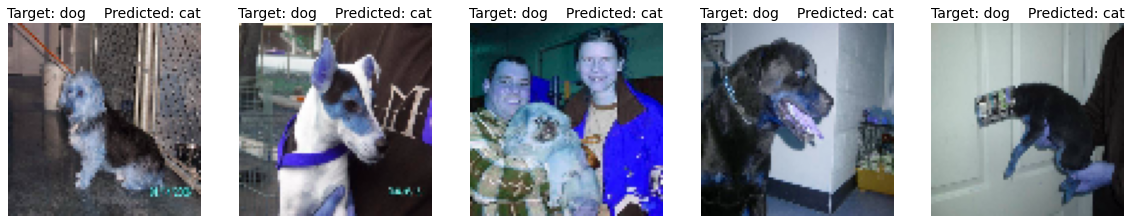

In [42]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=20, horizontal_flip=True)

model = keras.models.Sequential([
        keras.layers.Conv2D(filters=64, kernel_size=[7,7], strides=[1,1],
                            padding="same", activation="selu", input_shape=[80,80,3]),
        keras.layers.MaxPool2D(pool_size=2),
        keras.layers.Conv2D(filters=128, kernel_size=3, strides=1, padding="same",
                            activation="selu"),
        keras.layers.Conv2D(filters=128, kernel_size=3, strides=1, padding="same",
                            activation="selu"),
        keras.layers.Conv2D(filters=128, kernel_size=3, strides=1, padding="same",
                            activation="selu"),
        keras.layers.MaxPool2D(2),
        keras.layers.Conv2D(256, 3, padding="same"),
        keras.layers.Conv2D(256, 3, padding="same"),
        keras.layers.Conv2D(256, 3, padding="same"),
        keras.layers.MaxPool2D(2),
        keras.layers.Flatten(),
        keras.layers.Dense(128, activation="selu"),
        keras.layers.Dropout(0.15),
        keras.layers.Dense(64, activation="selu"),
        keras.layers.Dropout(0.15),
        keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam",
              metrics=["accuracy"])

history2 = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    epochs=5,
                    validation_data=(X_val, y_val),
                    callbacks=[keras.callbacks.EarlyStopping(patience=5)])

results = model.evaluate(X_test, y_test)
print(f'Model Results: {results}')

#Plot misclassified images. 
predictions = model.predict_classes(X_test)

misclassifiedIndexes = []
#Grab all images that were incorrect. 
index = 0
for target, predict in zip(y_test, predictions):
  if target != predict:
    misclassifiedIndexes.append(index)
  index += 1

import matplotlib.pyplot as plt

classes = ['dog', 'cat']

plt.figure(figsize=(20,4))
for index in range(5):
  plt.subplot(1,5,index+1)
  plt.imshow(X_test[misclassifiedIndexes[index]], cmap='binary')
  plt.axis('off')
  plt.title(f'Target: {classes[y_test[misclassifiedIndexes[index]]]}    Predicted: {classes[predictions[misclassifiedIndexes[index]]]}', fontsize=14)

plt.show()

**Part 3**</br>
Use transfer learning. Train on at least three different expert CNNs: Xception, a variant of ResNet, and a variant of EfficientNet. See [here](https://keras.io/api/applications/) for a full list of models available in Keras. Please note that many of these have special requirements (for image size etc). You decide (or experiment with) how to best transfer learn on these expert CNNs.

What is the accuracy of your best model (on both validation and testing sets)? Plot several misclassified images. Save your accuracy and val_accuracy per epoch (from your best model). You will plot them in Part 4.



In [58]:
keras.backend.clear_session()

In [55]:
#ResNet50
base_model = keras.applications.ResNet50(weights="imagenet",
                                         include_top=False,
                                         input_shape=(80,80,3))
global_avg = keras.layers.GlobalAveragePooling2D()(base_model.output)
dropout = keras.layers.Dropout(0.05)(global_avg)
output = keras.layers.Dense(10, activation="softmax")(dropout)
model = keras.models.Model(inputs=base_model.input, outputs=output)

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Nadam(1e-4), # need smaller lr
              metrics=["accuracy"])

history3 = model.fit(X_train, y_train, batch_size=32,
                    epochs=15, validation_data=(X_val, y_val),
                    callbacks=[keras.callbacks.EarlyStopping(patience=5)])

results = model.evaluate(X_test, y_test)
print(f'Model Results: {results}')



Epoch 1/15
469/469 [==============================] - 48s 72ms/step - loss: 0.5723 - accuracy: 0.8014 - val_loss: 0.7526 - val_accuracy: 0.5060
Epoch 2/15
469/469 [==============================] - 33s 70ms/step - loss: 0.0683 - accuracy: 0.9774 - val_loss: 0.2707 - val_accuracy: 0.8958
Epoch 3/15
469/469 [==============================] - 33s 70ms/step - loss: 0.0286 - accuracy: 0.9915 - val_loss: 0.1984 - val_accuracy: 0.9396
Epoch 4/15
469/469 [==============================] - 33s 70ms/step - loss: 0.0228 - accuracy: 0.9946 - val_loss: 0.2809 - val_accuracy: 0.9260
Epoch 5/15
469/469 [==============================] - 33s 70ms/step - loss: 0.0264 - accuracy: 0.9901 - val_loss: 0.2287 - val_accuracy: 0.9358
Epoch 6/15
469/469 [==============================] - 33s 70ms/step - loss: 0.0256 - accuracy: 0.9903 - val_loss: 0.2156 - val_accuracy: 0.9368
Epoch 7/15
469/469 [==============================] - 33s 70ms/step - loss: 0.0247 - accuracy: 0.9929 - val_loss: 0.1911 - val_accuracy:

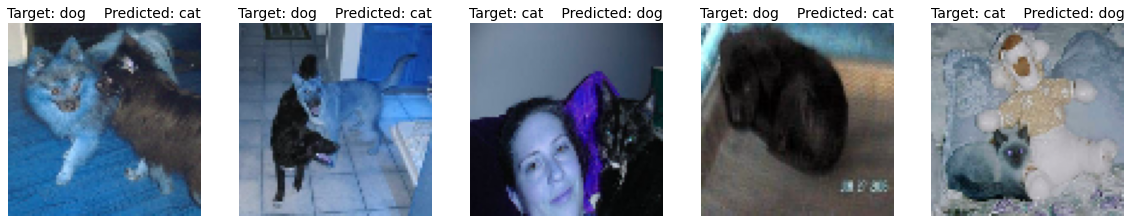

In [56]:
#Plot misclassified images. 
#predictions = model.predict_classes(X_test)

predict_prob=model.predict([X_test])
predictions=np.argmax(predict_prob,axis=1)

misclassifiedIndexes = []
#Grab all images that were incorrect. 
index = 0
for target, predict in zip(y_test, predictions):
  if target != predict:
    misclassifiedIndexes.append(index)
  index += 1

import matplotlib.pyplot as plt

classes = ['dog', 'cat']

plt.figure(figsize=(20,4))
for index in range(5):
  plt.subplot(1,5,index+1)
  plt.imshow(X_test[misclassifiedIndexes[index]], cmap='binary')
  plt.axis('off')
  plt.title(f'Target: {classes[y_test[misclassifiedIndexes[index]]]}    Predicted: {classes[predictions[misclassifiedIndexes[index]]]}', fontsize=14)

plt.show()

Epoch 1/15
469/469 [==============================] - 50s 83ms/step - loss: 0.8197 - accuracy: 0.7340 - val_loss: 0.2043 - val_accuracy: 0.9174
Epoch 2/15
469/469 [==============================] - 38s 81ms/step - loss: 0.1906 - accuracy: 0.9260 - val_loss: 0.1996 - val_accuracy: 0.9232
Epoch 3/15
469/469 [==============================] - 38s 81ms/step - loss: 0.1425 - accuracy: 0.9476 - val_loss: 0.1904 - val_accuracy: 0.9290
Epoch 4/15
469/469 [==============================] - 38s 81ms/step - loss: 0.0996 - accuracy: 0.9660 - val_loss: 0.1894 - val_accuracy: 0.9338
Epoch 5/15
469/469 [==============================] - 38s 81ms/step - loss: 0.0614 - accuracy: 0.9786 - val_loss: 0.2013 - val_accuracy: 0.9342
Epoch 6/15
469/469 [==============================] - 38s 81ms/step - loss: 0.0586 - accuracy: 0.9789 - val_loss: 0.2868 - val_accuracy: 0.9144
Epoch 7/15
469/469 [==============================] - 38s 81ms/step - loss: 0.0471 - accuracy: 0.9830 - val_loss: 0.1800 - val_accuracy:

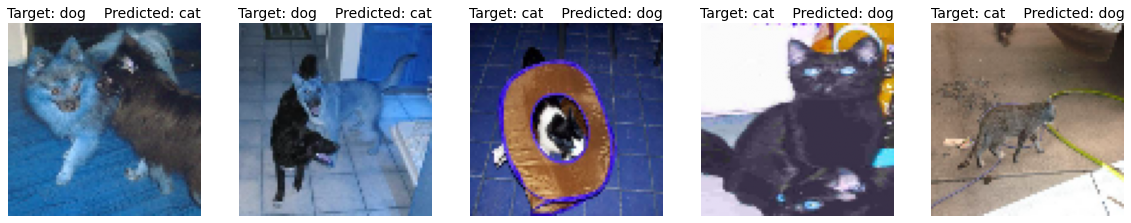

In [57]:
#Xception
base_model = keras.applications.Xception(weights="imagenet", 
                                              include_top=False,
                                         input_shape=(80,80,3))
global_avg = keras.layers.GlobalAveragePooling2D()(base_model.output)
dropout = keras.layers.Dropout(0.05)(global_avg) 
output = keras.layers.Dense(10, activation="softmax")(dropout)
model = keras.models.Model(inputs=base_model.input, outputs=output)

from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=20, horizontal_flip=True)

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Nadam(1e-4), # need smaller lr
              metrics=["accuracy"])

history4 = model.fit(datagen.flow(X_train, y_train, batch_size=32), 
                    epochs=15, validation_data=(X_val, y_val), 
                    callbacks=[keras.callbacks.EarlyStopping(patience=5)])

results = model.evaluate(X_test, y_test)
print(f'Model Results: {results}')

#Plot misclassified images. 
#predictions = model.predict_classes(X_test)

predict_prob=model.predict([X_test])
predictions=np.argmax(predict_prob,axis=1)

misclassifiedIndexes = []
#Grab all images that were incorrect. 
index = 0
for target, predict in zip(y_test, predictions):
  if target != predict:
    misclassifiedIndexes.append(index)
  index += 1

import matplotlib.pyplot as plt

classes = ['dog', 'cat']

plt.figure(figsize=(20,4))
for index in range(5):
  plt.subplot(1,5,index+1)
  plt.imshow(X_test[misclassifiedIndexes[index]], cmap='binary')
  plt.axis('off')
  plt.title(f'Target: {classes[y_test[misclassifiedIndexes[index]]]}    Predicted: {classes[predictions[misclassifiedIndexes[index]]]}', fontsize=14)

plt.show()

Epoch 1/15
469/469 [==============================] - 53s 76ms/step - loss: 1.0919 - accuracy: 0.6203 - val_loss: 1.8684 - val_accuracy: 0.4954
Epoch 2/15
469/469 [==============================] - 35s 74ms/step - loss: 0.3276 - accuracy: 0.8606 - val_loss: 0.7006 - val_accuracy: 0.6100
Epoch 3/15
469/469 [==============================] - 34s 73ms/step - loss: 0.2612 - accuracy: 0.8930 - val_loss: 0.4757 - val_accuracy: 0.8040
Epoch 4/15
469/469 [==============================] - 34s 73ms/step - loss: 0.2174 - accuracy: 0.9110 - val_loss: 0.8073 - val_accuracy: 0.5728
Epoch 5/15
469/469 [==============================] - 34s 73ms/step - loss: 0.1847 - accuracy: 0.9226 - val_loss: 0.7671 - val_accuracy: 0.6594
Epoch 6/15
469/469 [==============================] - 34s 73ms/step - loss: 0.1629 - accuracy: 0.9335 - val_loss: 0.3650 - val_accuracy: 0.8558
Epoch 7/15
469/469 [==============================] - 34s 73ms/step - loss: 0.1504 - accuracy: 0.9372 - val_loss: 0.3427 - val_accuracy:

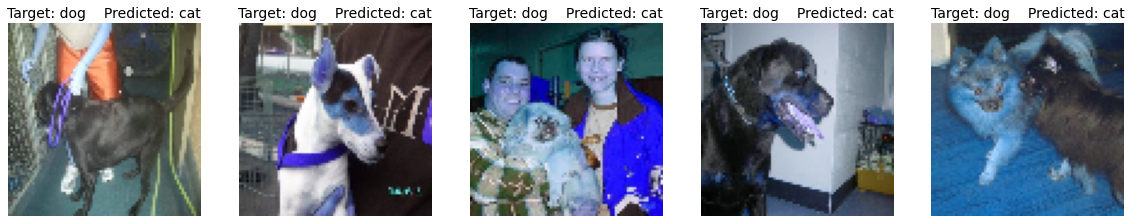

In [64]:
#EfficientNet
base_model = keras.applications.EfficientNetB0(weights="imagenet", 
                                              include_top=False,
                                             input_shape=(80,80,3))
global_avg = keras.layers.GlobalAveragePooling2D()(base_model.output)
dropout = keras.layers.Dropout(0.05)(global_avg) 
output = keras.layers.Dense(10, activation="softmax")(dropout)
model = keras.models.Model(inputs=base_model.input, outputs=output)

from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=20, horizontal_flip=True)

model.compile(loss="sparse_categorical_crossentropy",
                optimizer=keras.optimizers.Nadam(1e-4), # need smaller lr
                metrics=["accuracy"])

n_epochs = 15
batch_size = 32
history5 = model.fit(datagen.flow(X_train, y_train, batch_size=batch_size),
                    epochs=n_epochs,
                    validation_data=(X_val, y_val),
                    callbacks=[keras.callbacks.EarlyStopping(patience=5)])

results = model.evaluate(X_test, y_test)
print(f'Model Results: {results}')

#Plot misclassified images. 
#predictions = model.predict_classes(X_test)

predict_prob=model.predict([X_test])
predictions=np.argmax(predict_prob,axis=1)

misclassifiedIndexes = []
#Grab all images that were incorrect. 
index = 0
for target, predict in zip(y_test, predictions):
  if target != predict:
    misclassifiedIndexes.append(index)
  index += 1

import matplotlib.pyplot as plt

classes = ['dog', 'cat']

plt.figure(figsize=(20,4))
for index in range(5):
  plt.subplot(1,5,index+1)
  plt.imshow(X_test[misclassifiedIndexes[index]], cmap='binary')
  plt.axis('off')
  plt.title(f'Target: {classes[y_test[misclassifiedIndexes[index]]]}    Predicted: {classes[predictions[misclassifiedIndexes[index]]]}', fontsize=14)

plt.show()

**Part 4**</br>
Plot the training and validation accuracy per epoch for your (best) model from each part. Discuss any differences. Which model(s) tend to be overfit? Which model(s) are not? Why?

Note: If you have a model B that is only a little better than a model A with respect to validation/testing accuracy, but model B is not overfit and model A is, that is actually a huge improvement. 

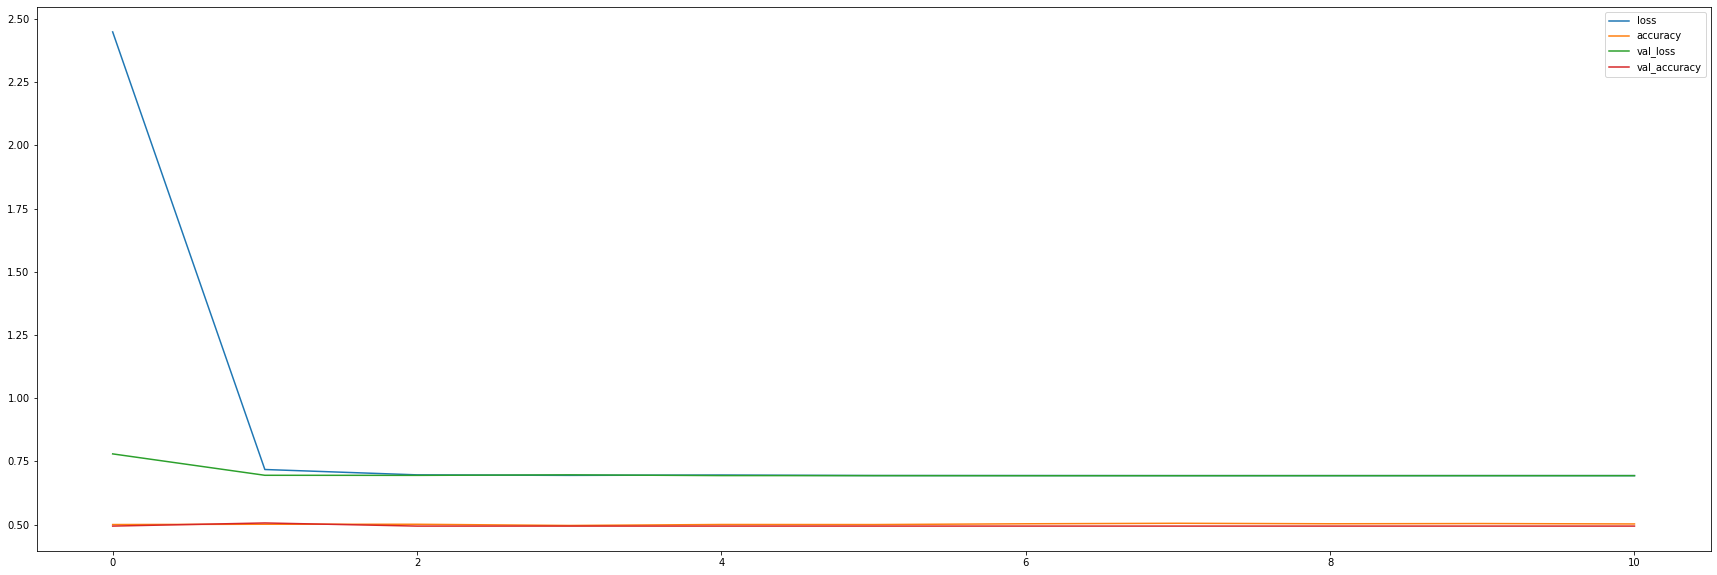

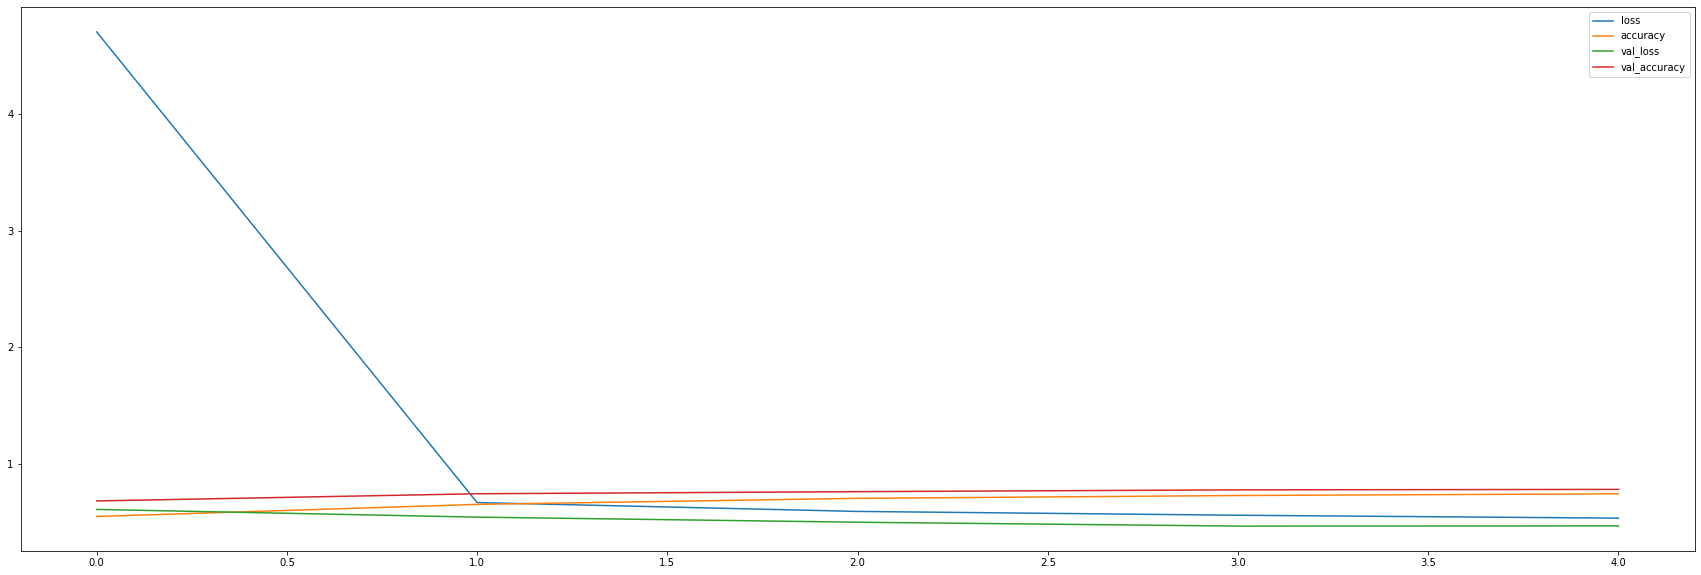

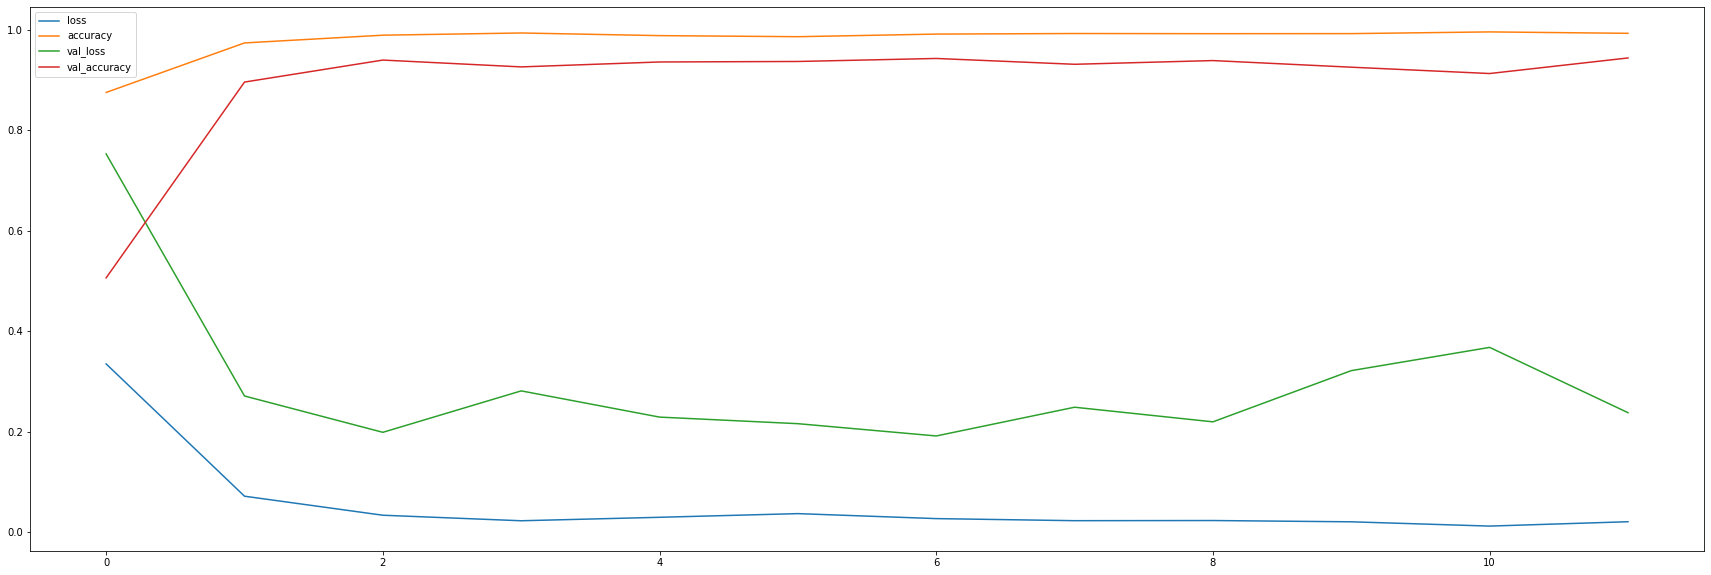

In [67]:
pd.DataFrame(history1.history).plot(figsize=(30, 10))
pd.DataFrame(history2.history).plot(figsize=(30, 10))
pd.DataFrame(history3.history).plot(figsize=(30, 10))

Best Model (Part 2): Model #3 (With 5 epochs). 

Best Model (Part 3): ResNet50

Models that are overfit: No models seem to overfit the dataset.

Models that are not overfit: All aren;t overfitting the data.

Explanation:

Part 1:
The results were unimpressive but not surprising. Based on what we've learned before, models like the one on Part 1 are not good at classifying images. 

Part 2: Part 2 surprised me. While Model 1 had the same terrible accuracy as Part 1's model, Part 2 surprised me at first with its accuracy. However, I noticed that after the 7th epoch, loss was extremely high and tanked the entire model, and consistently (Hence the KeyBoardInterrupt in my output). Hence, Model 3 was created, and with 5 epochs, achieved the same high accuracy while avoiding the epoch with massive loss. 

Part 3: Part 3's models were interesting. While I expected the models to be much more accurate than the previous models in this project, I did not expect to see the difference in accuracy between 1/2 and 3. Models 1 and 2 (ResNet and Xception) maintained about ~90% accuracy, while Model 3 (EfficientNet) only achieved ~73% accuracy. 

**GRADUATE STUDENTS ONLY**</br>
Again, test your best model on the Kaggle testing set and submit. Show a screenshot etc as proof.

N/A